<a href="https://colab.research.google.com/github/DanyPao/DataScience1-Daniela-Esposito/blob/main/Visualizacion_Daniela_Esposito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Predicción de climática en Australia (Prediccion de lluvia al dia siguiente)
## Alumna:
Daniela Paola Espósito
## Comisión:
61140
## Docente:
Jorge Ruiz
## Tutora:
Abril Noguera

## Abstract

Hoy en día muchas empresas tanto privadas como estatales precisan de las predicciones meteorológicas; en muchas ramas como en la agricultura, ganadería, construcción, minería, aeronáutica, navegación, salud pública, gestión de riesgo, turismo, pesca, energías renovables, logística, investigadores y científicos, para dar alertas a la población ante fenómenos meteorológicos extremos, incluso para deportes o recitales.
No debemos olvidar que inclusive el común de los ciudadanos necesita saber cómo estará el clima para poder realizar sus actividades cotidianas sin problemas.
Todas estas áreas utilizan las predicciones meteorológicas principalmente para planificación y toma de decisiones, ya que el clima puede afectar la seguridad y eficiencia en estas áreas.
A través de este modelo de Machine Learning podremos llegar una aproximación sobre la probabilidad de lluvias al día siguiente en función de los datos proporcionados.
Podemos hacernos las siguientes preguntas:
¿Cuánta humedad había el día anterior a que lloviera?
¿Llovió el día anterior a que lloviera?
¿Hubo mucho viento el día anterior?
¿Qué temperaturas hubo en diferentes horarios el día anterior?
¿Hay ubicaciones que están relacionadas?
¿El tipo de clima de la región modifica las probabilidades de lluvia para el día siguiente?
¿La presión atmosférica del día anterior influye en la probabilidad de lluvias?
Para realizar esta investigación, sería mucho más eficaz si la base de datos contara con fechas en que fueron realizadas las mediciones para poder comparar entre las diferentes ubicaciones en el mismo día, o al menos que contara con las estaciones del año, ya que no es lo mismo las temperaturas o las lluvias en verano, invierno, otoño o primavera.


## Objetivo

El objetivo de este trabajo es ver si es posible predecir si llovera al día siguiente, teniendo en cuenta: si al día anterior llovió, #(completar con los datos de machine learning (que datos fueron utilizados))


## Hipótesis

Un modelo de aprendizaje automático será capaz de clasificar con precisión las instancias en diferentes categorías basadas en los siguientes atributos:

"Llueve Mañana"

"No Llueve mañana"

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from mlxtend.plotting import plot_decision_regions

import graphviz

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='husl')

## Carga de datos

In [2]:
url = 'https://raw.githubusercontent.com/DanyPao/DataScience1-Daniela-Esposito/main/Weather%20Training%20Data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


## Descripcion de Variables

Ubicacion - Nombre de la ciudad de Australia.

MinTemp - Temperatura mínima durante un dia en particular. (grados Celsius)

MaxTemp - Temperatura máxima durante un día particular. (grados Celsius)

Lluvia - Caída de lluvia durante un dia en particular. (milímetros)

Evaporacion - Evaporacion durante un día en particular. (milímetros)

LuzSolar - Luz solar durante un dia en particular. (horas)

DirRafVien - Dirección de la ráfaga de viento más fuerte en un día en particular. (16 puntos cardinales)

VelRafVien - Velocidad de la ráfaga de viento más fuerte en un día en particular. (kilometros por hora)

DirVien9am - Dirección del viento durante 10 minutos antes de las 9 am. (puntos cardinales)

DirVien3pm - Dirección del viento durante 10 minutos antes de las 3 pm. (puntos cardinales)

VelVien9am - Velocidad del viento durante 10 minutos antes de las 9 am. (Kilómetros por hora)

VelVien3pm - Velocidad del viento durante 10 minutos antes de las 3 pm. (Kilómetros por hora)

Humedad9am - Humedad del viento a las 9 am. (porcentaje)

Humedad3pm - Humedad del viento a las 3 pm. (porcentaje)

Presion9am - Presión atmosférica a las 9 am. (hectopascales)

Presion3pm - Presión atmosférica a las 3 pm. (hectopascales)

Nubes9am - Partes del cielo oscurecidas por nubes a las 9 am. (octavos)

Nubes3pm - Partes del cielo oscurecidas por nubes a las 3 pm. (octavos)

Temp9am - Temperatura a las 9 am. (grados Celsius)

Temp3pm - Temperatura a las 3 pm. (grados Celsius)

LluviaHoy - Si hoy llueve, entonces "Sí". Si hoy no llueve entonces 'No'.

LluviaManana - Si mañana llueve, entonces 1 (Sí). Si mañana no llueve entonces 0 (No).

## Normalización

In [4]:
df=df.rename(columns={'Location':'Ubicacion', 'Rainfall':'Lluvia', 'Evaporation':'Evaporacion', 'Sunshine':'LuzSolar', 'WindGustDir':'DirRafVien', 'WindGustSpeed':'VelRafVien', 'WindDir9am':'DirVien9am', 'WindDir3pm':'DirVien3pm', 'WindSpeed9am':'VelVien9am', 'WindSpeed3pm':'VelVien3pm', 'Humidity9am':'Humedad9am', 'Humidity3pm':'Humedad3pm', 'Pressure9am':'Presion9am', 'Pressure3pm':'Presion3pm', 'Cloud9am':'Nubes9am', 'Cloud3pm':'Nubes3pm', 'RainToday':'LluviaHoy', 'RainTomorrow':'LluviaManana'})
df.head()

,row ID,Ubicacion,MinTemp,MaxTemp,Lluvia,Evaporacion,LuzSolar,DirRafVien,VelRafVien,DirVien9am,DirVien3pm,VelVien9am,VelVien3pm,Humedad9am,Humedad3pm,Presion9am,Presion3pm,Nubes9am,Nubes3pm,Temp9am,Temp3pm,LluviaHoy,LluviaManana
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [5]:
df['LluviaHoy'].loc[df['LluviaHoy'] == 'Yes'] = 1
df['LluviaHoy'].loc[df['LluviaHoy'] == 'No'] = 0
df.head()

,row ID,Ubicacion,MinTemp,MaxTemp,Lluvia,Evaporacion,LuzSolar,DirRafVien,VelRafVien,DirVien9am,DirVien3pm,VelVien9am,VelVien3pm,Humedad9am,Humedad3pm,Presion9am,Presion3pm,Nubes9am,Nubes3pm,Temp9am,Temp3pm,LluviaHoy,LluviaManana
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0


## Estadistica descriptiva

In [6]:
df.describe().round(2)

,MinTemp,MaxTemp,Lluvia,Evaporacion,LuzSolar,VelRafVien,VelVien9am,VelVien3pm,Humedad9am,Humedad3pm,Presion9am,Presion3pm,Nubes9am,Nubes3pm,Temp9am,Temp3pm,LluviaManana
count,99073.00,99286.00,98537.00,56985.00,52199.00,93036.00,98581.0,97681.00,98283.00,97010.00,89768.00,89780.00,61944.00,59514.00,98902.00,97612.00,99516.00
mean,12.18,23.22,2.35,5.46,7.62,39.98,14.0,18.65,68.87,51.43,1017.68,1015.29,4.45,4.52,16.97,21.68,0.22
std,6.39,7.12,8.49,4.16,3.78,13.58,8.9,8.80,19.07,20.78,7.11,7.05,2.89,2.72,6.49,6.93,0.42
min,-8.50,-4.10,0.00,0.00,0.00,6.00,0.0,0.00,0.00,0.00,980.50,978.20,0.00,0.00,-7.00,-5.10,0.00
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.0,13.00,57.00,37.00,1013.00,1010.50,1.00,2.00,12.30,16.60,0.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.0,19.00,70.00,52.00,1017.70,1015.30,5.00,5.00,16.70,21.10,0.00
75%,16.80,28.20,0.80,7.40,10.60,48.00,19.0,24.00,83.00,65.00,1022.40,1020.00,7.00,7.00,21.50,26.40,0.00
max,33.90,48.10,371.00,86.20,14.50,135.00,130.0,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,1.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row ID        99516 non-null  object 
 1   Ubicacion     99516 non-null  object 
 2   MinTemp       99073 non-null  float64
 3   MaxTemp       99286 non-null  float64
 4   Lluvia        98537 non-null  float64
 5   Evaporacion   56985 non-null  float64
 6   LuzSolar      52199 non-null  float64
 7   DirRafVien    92995 non-null  object 
 8   VelRafVien    93036 non-null  float64
 9   DirVien9am    92510 non-null  object 
 10  DirVien3pm    96868 non-null  object 
 11  VelVien9am    98581 non-null  float64
 12  VelVien3pm    97681 non-null  float64
 13  Humedad9am    98283 non-null  float64
 14  Humedad3pm    97010 non-null  float64
 15  Presion9am    89768 non-null  float64
 16  Presion3pm    89780 non-null  float64
 17  Nubes9am      61944 non-null  float64
 18  Nubes3pm      59514 non-nu

In [8]:
df['Ubicacion']=df['Ubicacion'].astype('category')
df['DirRafVien']=df['DirRafVien'].astype('category')
df['DirVien9am']=df['DirVien9am'].astype('category')
df['DirVien3pm']=df['DirVien3pm'].astype('category')
df['Nubes9am']=df['Nubes9am'].astype('category')
df['Nubes3pm']=df['Nubes3pm'].astype('category')
df['LluviaHoy']=df['LluviaHoy'].astype('float')
df['LluviaManana']=df['LluviaManana'].astype('float')

In [9]:
df.describe(include='category')

,Ubicacion,DirRafVien,DirVien9am,DirVien3pm,Nubes9am,Nubes3pm
count,99516,92995,92510,96868,61944.0,59514.0
unique,49,16,16,16,10.0,10.0
top,Canberra,W,N,SE,7.0,7.0
freq,2393,6843,8052,7410,13875.0,12759.0


In [10]:
df.shape

(99516, 23)

In [11]:
df.columns

Index(['row ID', 'Ubicacion', 'MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion',
       'LuzSolar', 'DirRafVien', 'VelRafVien', 'DirVien9am', 'DirVien3pm',
       'VelVien9am', 'VelVien3pm', 'Humedad9am', 'Humedad3pm', 'Presion9am',
       'Presion3pm', 'Nubes9am', 'Nubes3pm', 'Temp9am', 'Temp3pm', 'LluviaHoy',
       'LluviaManana'],
      dtype='object')

In [12]:
cantNaN= pd.DataFrame({'Cantidad':df.isna().sum(),'Porcentaje':(df.isna().sum())/(df.shape[0])*(100)})
cantNaN

,Cantidad,Porcentaje
row ID,0,0.000000
Ubicacion,0,0.000000
MinTemp,443,0.445155
MaxTemp,230,0.231119
Lluvia,979,0.983761
Evaporacion,42531,42.737851
LuzSolar,47317,47.547128
DirRafVien,6521,6.552715
VelRafVien,6480,6.511516
DirVien9am,7006,7.040074


Las columnas 'Evaporacion', 'LuzSolar', 'Nubes9am' y 'Nubes3pm' tienen un porcentaje mayor al 35% de números faltantes.

Y la columna 'row ID'es inutil.

Por lo tanto, eliminaré estas columnas.


In [13]:
df.drop(['row ID','Evaporacion','LuzSolar','Nubes9am','Nubes3pm'],axis=1,inplace=True)

In [14]:
df.shape

(99516, 18)

Para el caso de las variables categoricas, voy a reemplazar los datos faltantes (NaN) por la moda de la ubicación correspondiente. Y en el caso de las variables numéricas, las reemplazaré por la mediana o media (según crea conveniente), también por ubicación.


In [15]:
#Reemplazo de NaNs en Variables Categoricas por la Moda
df['DirRafVien'].fillna(df['DirRafVien'].mode()[0],inplace=True)
df['DirVien9am'].fillna(df['DirVien9am'].mode()[0],inplace=True)
df['DirVien3pm'].fillna(df['DirVien3pm'].mode()[0],inplace=True)
df['LluviaHoy'].fillna(df['LluviaHoy'].mode()[0],inplace=True)

df.isna().sum()

Ubicacion          0
MinTemp          443
MaxTemp          230
Lluvia           979
DirRafVien         0
VelRafVien      6480
DirVien9am         0
DirVien3pm         0
VelVien9am       935
VelVien3pm      1835
Humedad9am      1233
Humedad3pm      2506
Presion9am      9748
Presion3pm      9736
Temp9am          614
Temp3pm         1904
LluviaHoy          0
LluviaManana       0
dtype: int64

In [16]:
#df2=df.groupby(['Ubicacion'])[['MinTemp','MaxTemp','Lluvia','VelRafVien','VelVien9am','VelVien3pm','Humedad9am','Humedad3pm','Presion9am','Presion3pm','Temp9am','Temp3pm']].median().reset_index()
#df2.isna().sum()

In [17]:
#df2[df2['Presion9am'].isnull()]

In [18]:
#df2[df2['Presion3pm'].isnull()]

In [19]:
#df2[df2['VelRafVien'].isnull()]

En este punto puedo reemplazar los datos faltantes por la mediana general ya en que estas ciudades no ha sido posible realizar una mediana en algunas de sus variables por falta de datos. (Solo en las ubicaciones donde no sea posible)

In [20]:
#Reemplazo de NaNs en Variables Numericas por la mediana general. En casos especificos que utilizando groupby en las lineas de arriba continuaban siendo NaNs.
df.loc[(df['Ubicacion'] == 'MountGinini') & (df['Presion9am'].isna()), 'Presion9am'] = df['Presion9am'].median()
df.loc[(df['Ubicacion'] == 'MountGinini') & (df['Presion3pm'].isna()), 'Presion3pm'] = df['Presion3pm'].median()

df.loc[(df['Ubicacion'] == 'Newcastle') & (df['Presion9am'].isna()), 'Presion9am'] = df['Presion9am'].median()
df.loc[(df['Ubicacion'] == 'Newcastle') & (df['Presion3pm'].isna()), 'Presion3pm'] = df['Presion3pm'].median()

df.loc[(df['Ubicacion'] == 'Penrith') & (df['Presion9am'].isna()), 'Presion9am'] = df['Presion9am'].median()
df.loc[(df['Ubicacion'] == 'Penrith') & (df['Presion3pm'].isna()), 'Presion3pm'] = df['Presion3pm'].median()

df.loc[(df['Ubicacion'] == 'SalmonGums') & (df['Presion9am'].isna()), 'Presion9am'] = df['Presion9am'].median()
df.loc[(df['Ubicacion'] == 'SalmonGums') & (df['Presion3pm'].isna()), 'Presion3pm'] = df['Presion3pm'].median()

df.loc[(df['Ubicacion'] == 'Albany') & (df['VelRafVien'].isna()), 'VelRafVien'] = df['VelRafVien'].median()
df.loc[(df['Ubicacion'] == 'Newcastle') & (df['VelRafVien'].isna()), 'VelRafVien'] = df['VelRafVien'].median()

In [21]:
df2=df.groupby(['Ubicacion'])[['MinTemp','MaxTemp','Lluvia','VelRafVien','VelVien9am','VelVien3pm','Humedad9am','Humedad3pm','Presion9am','Presion3pm','Temp9am','Temp3pm']].median().reset_index()
df2.isna().sum()

Ubicacion     0
MinTemp       0
MaxTemp       0
Lluvia        0
VelRafVien    0
VelVien9am    0
VelVien3pm    0
Humedad9am    0
Humedad3pm    0
Presion9am    0
Presion3pm    0
Temp9am       0
Temp3pm       0
dtype: int64

In [22]:
from collections.abc import Mapping
mapping_dict = df2.set_index('Ubicacion')['MinTemp'].to_dict()
df['FillMinTemp'] = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['MaxTemp'].to_dict()
df['FillMaxTemp'] = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['Lluvia'].to_dict()
df['FillLluvia']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['VelRafVien'].to_dict()
df['FillVelRafVien']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['VelVien9am'].to_dict()
df['FillVelVien9am']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['VelVien3pm'].to_dict()
df['FillVelVien3pm']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['Humedad9am'].to_dict()
df['FillHumedad9am']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['Humedad3pm'].to_dict()
df['FillHumedad3pm']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['Presion9am'].to_dict()
df['FillPresion9am']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['Presion3pm'].to_dict()
df['FillPresion3pm']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['Temp9am'].to_dict()
df['FillTemp9am']  = df['Ubicacion'].map(mapping_dict)
mapping_dict = df2.set_index('Ubicacion')['Temp3pm'].to_dict()
df['FillTemp3pm']  = df['Ubicacion'].map(mapping_dict)
df['MinTemp']= df['MinTemp'].fillna(df['FillMinTemp'])
df['MaxTemp']= df['MaxTemp'].fillna(df['FillMaxTemp'])
df['Lluvia']= df['Lluvia'].fillna(df['FillLluvia'])
df['VelRafVien']= df['VelRafVien'].fillna(df['FillVelRafVien'])
df['VelVien9am']= df['VelVien9am'].fillna(df['FillVelVien9am'])
df['VelVien3pm']= df['VelVien3pm'].fillna(df['FillVelVien3pm'])
df['Humedad9am']= df['Humedad9am'].fillna(df['FillHumedad9am'])
df['Humedad3pm']= df['Humedad3pm'].fillna(df['FillHumedad3pm'])
df['Presion9am']= df['Presion9am'].fillna(df['FillPresion9am'])
df['Presion3pm']= df['Presion3pm'].fillna(df['FillPresion3pm'])
df['Temp9am']= df['Temp9am'].fillna(df['FillTemp9am'])
df['Temp3pm']= df['Temp3pm'].fillna(df['FillTemp3pm'])
df = df.drop(['FillMinTemp','FillMaxTemp','FillLluvia','FillVelRafVien','FillVelVien9am','FillVelVien3pm','FillHumedad9am','FillHumedad3pm','FillPresion9am','FillPresion3pm','FillTemp9am','FillTemp3pm'], axis=1)
df.isna().sum()


Ubicacion       0
MinTemp         0
MaxTemp         0
Lluvia          0
DirRafVien      0
VelRafVien      0
DirVien9am      0
DirVien3pm      0
VelVien9am      0
VelVien3pm      0
Humedad9am      0
Humedad3pm      0
Presion9am      0
Presion3pm      0
Temp9am         0
Temp3pm         0
LluviaHoy       0
LluviaManana    0
dtype: int64

## Cardinalidad

In [23]:
cardinalidad=pd.DataFrame({'Cantidad':df.nunique()})
cardinalidad

,Cantidad
Ubicacion,49
MinTemp,389
MaxTemp,503
Lluvia,601
DirRafVien,16
VelRafVien,67
DirVien9am,16
DirVien3pm,16
VelVien9am,44
VelVien3pm,44


## Outliers

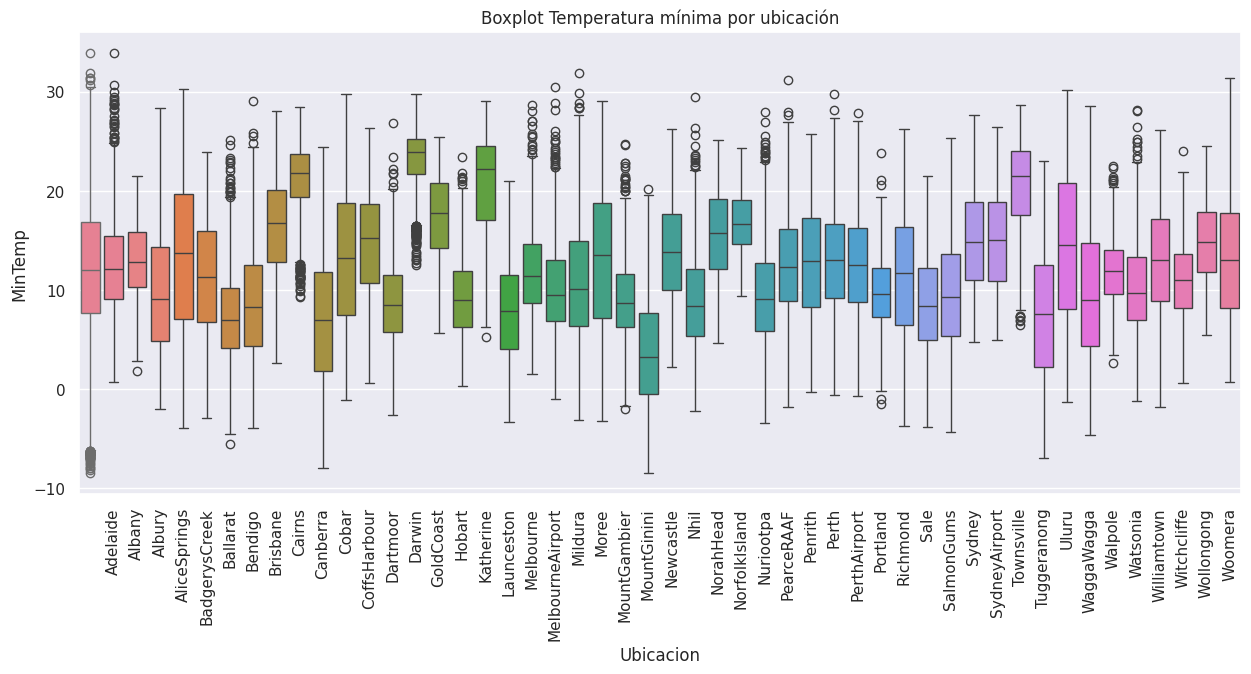

In [24]:
plt.figure(figsize=(15,6))
plt.title('Boxplot Temperatura mínima por ubicación')
sns.boxplot(y=df.MinTemp)
ax=sns.boxplot(y=df.MinTemp, x=df.Ubicacion, hue=df.Ubicacion)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

En este gráfico se puede apreciar que la temperatura mínima general parece tener una gran cantidad de outliers en sus valores mas bajos.
Pero, cuando se desglosa por ubicación, al haber localidades muy al sur, estos valores estan dentro de los valores normales para su latitud.
Y por lo contrario, se puede ver que hay muchos outliers en los valores mas altos para algunas ubicaciones.

<Axes: title={'center': 'Boxplot Temperatura mínima por ubicación'}, xlabel='MinTemp', ylabel='Ubicacion'>

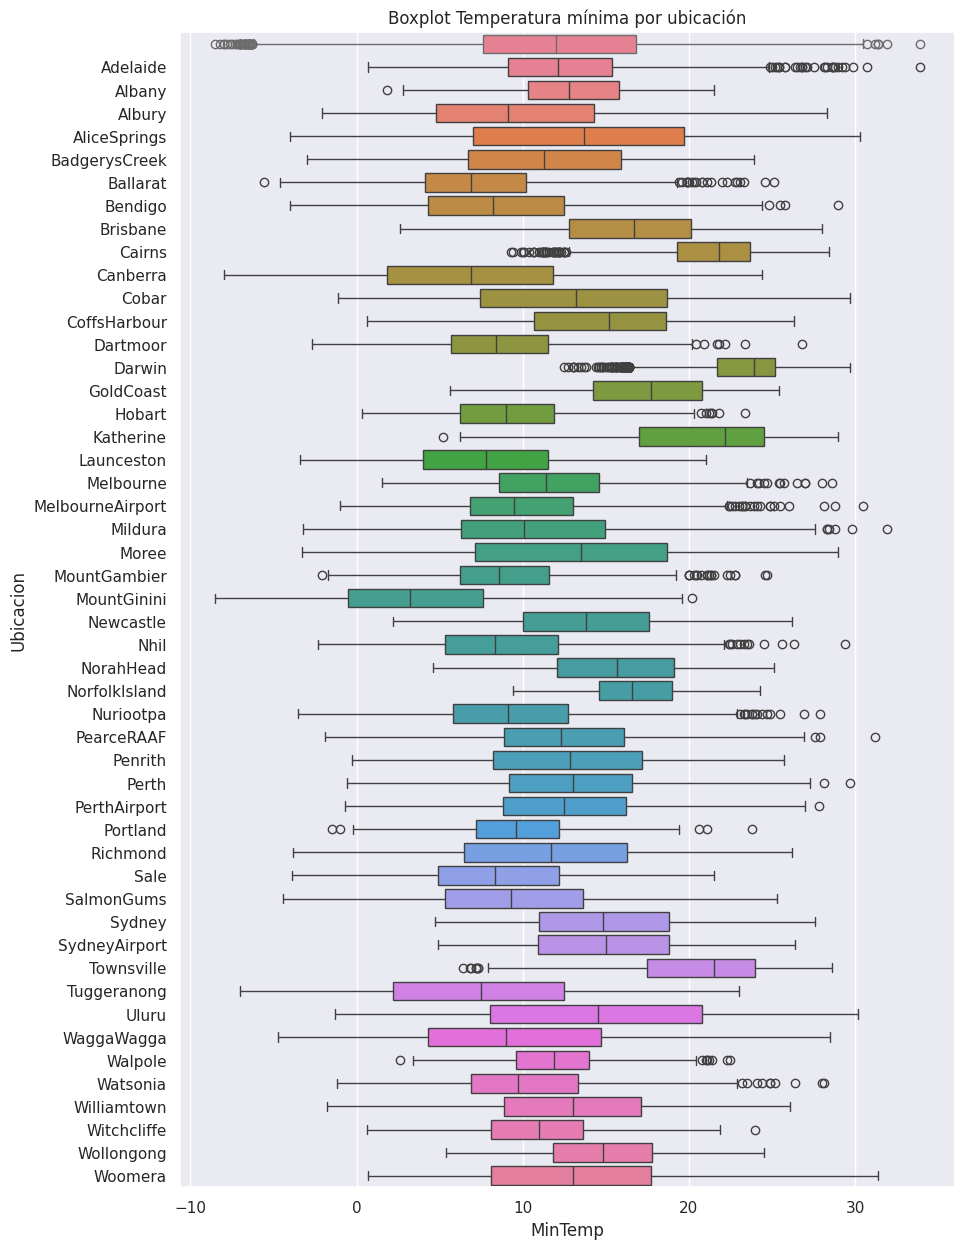

In [25]:
plt.figure(figsize=(10,15))
plt.title('Boxplot Temperatura mínima por ubicación')
sns.boxplot(x=df.MinTemp)
sns.boxplot(x=df.MinTemp, y=df.Ubicacion, hue=df.Ubicacion)

#Este gráfico es el mismo que el de arriba, pero con una diagramación diferente, la cual fue sugerida por la tutora Abril en la corrección de la primera entrega:

#"El gráfico 'Boxplot Temperatura mínima por ubicación' es bastante difícil de leer. Usualmente, las variables de texto van en el eje 'y'
# para que no tengamos que girar la cabeza para leerlos. "

#Personalmente prefiero con las ciudades en el eje 'x', ya que por la cantidad de ciudades analizadas se puede ver el gráfico entero de mejor manera.
#Lo mismo sucede para los dos gráficos siguientes a este. Por lo tanto, voy a dejarlos con los nombres de las ciudades sobre el eje 'x'.


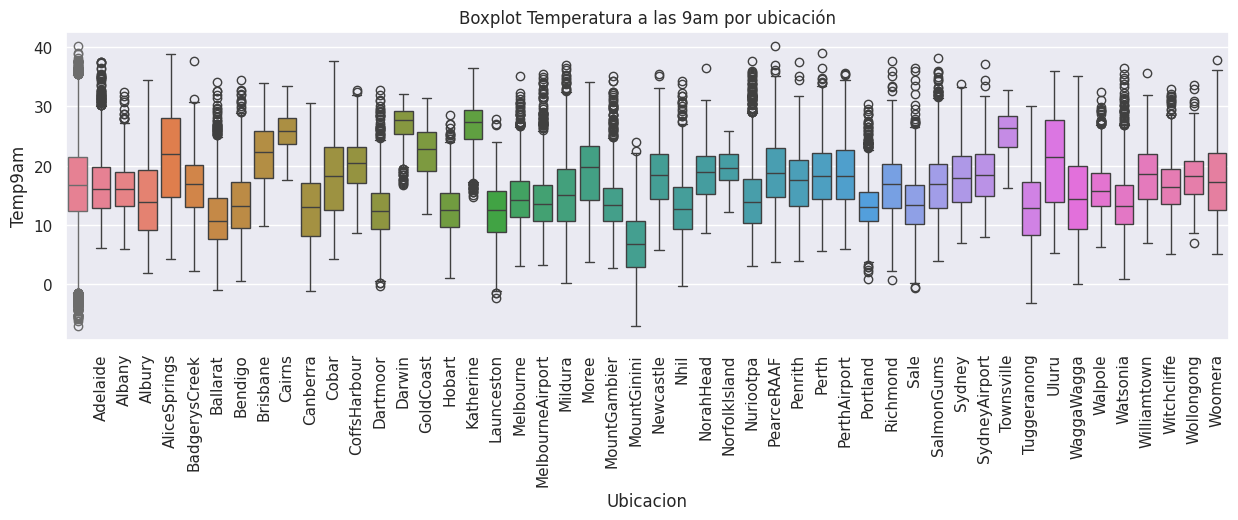

In [26]:
plt.figure(figsize=(15,4))
plt.title('Boxplot Temperatura a las 9am por ubicación')
sns.boxplot(y=df.Temp9am)
ax=sns.boxplot(y=df.Temp9am, x=df.Ubicacion, hue=df.Ubicacion)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

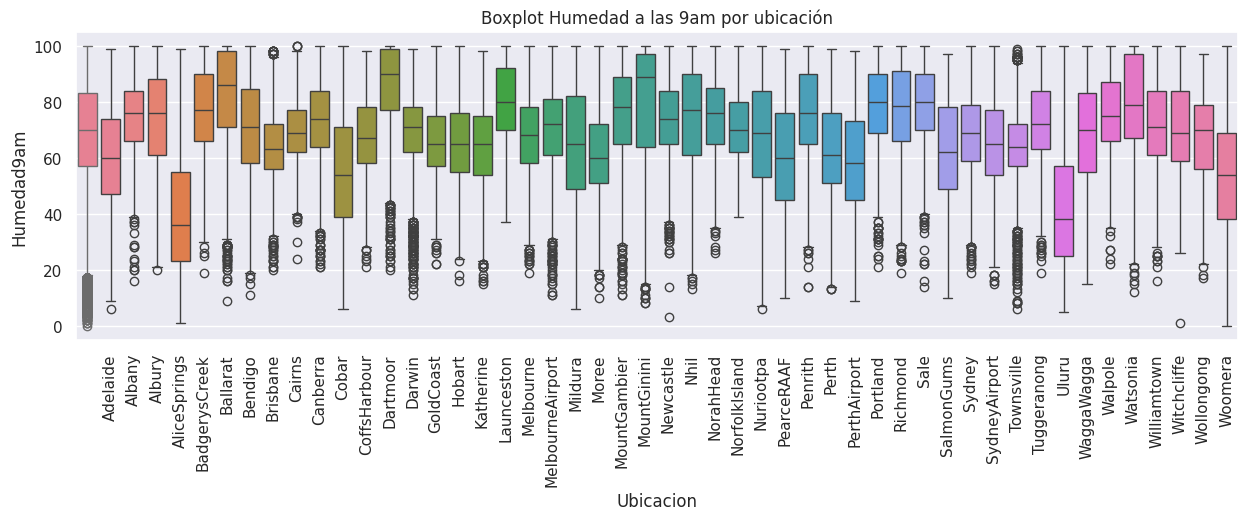

In [27]:
plt.figure(figsize=(15,4))
plt.title('Boxplot Humedad a las 9am por ubicación')
sns.boxplot(y=df.Humedad9am)
ax=sns.boxplot(y=df.Humedad9am, x=df.Ubicacion, hue=df.Ubicacion)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Lo mismo sucede con otras variables numéricas como por ejemplo la humedad o la temperatura a las 9am.
Por esta razon yo trataría estos outliers teniendo en cuenta su ubicación.

## Correlación

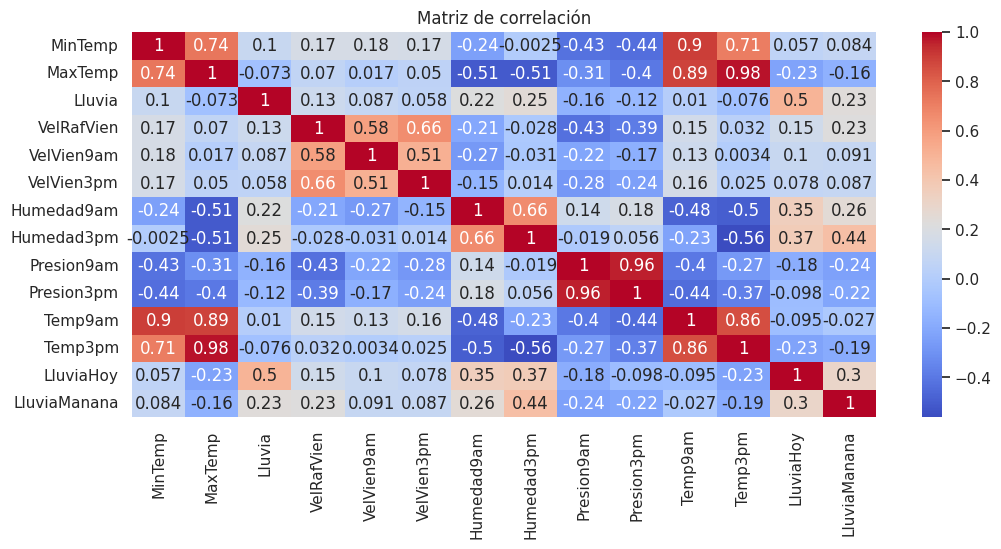

In [28]:
plt.figure(figsize=(12,5))
plt.title('Matriz de correlación')
matriz_correlacion= df.corr(numeric_only=True)
sns.heatmap(matriz_correlacion,cmap='coolwarm',annot=True)
plt.show()

Se puede decir con respecto a este gráfico que las mayores correlaciones son entre el mismo tipo de variable a diferente hora o entre maximos y minimos, como por ejemplo, la relacion entre Tem9am, Temp3pm, MinTemp y MaxTemp.

## Vientos

Text(0, 0.5, 'Cantidad de datos')

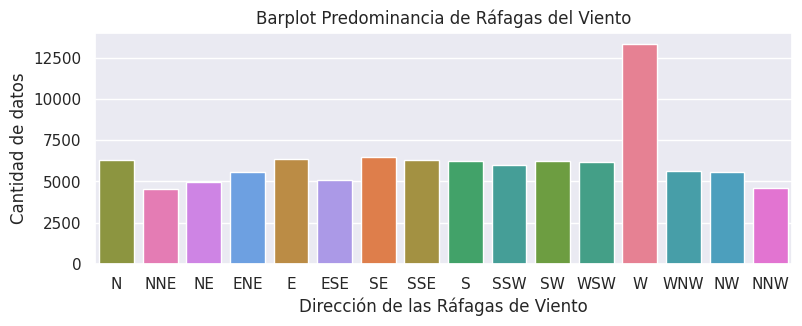

In [29]:
DirViento=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
plt.figure(figsize=(9,3))
plt.title('Barplot Predominancia de Ráfagas del Viento')
sns.barplot(x=df['DirRafVien'].value_counts().index, y=df['DirRafVien'].value_counts(), hue=DirViento, order=DirViento, legend=False)
plt.xlabel('Dirección de las Ráfagas de Viento')
plt.ylabel('Cantidad de datos')

Text(0, 0.5, 'Cantidad de datos')

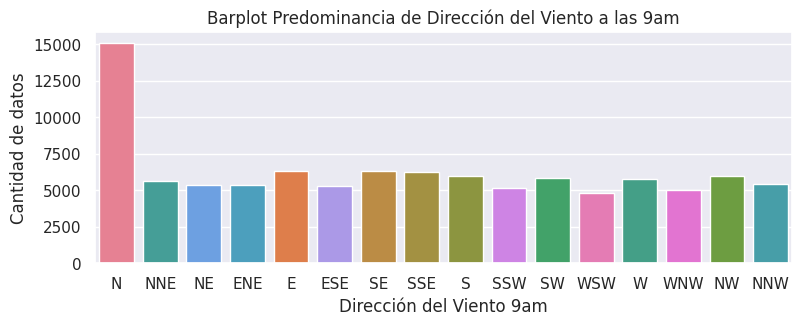

In [30]:
plt.figure(figsize=(9,3))
plt.title('Barplot Predominancia de Dirección del Viento a las 9am')
sns.barplot(x=df['DirVien9am'].value_counts().index, y=df['DirVien9am'].value_counts(), hue=DirViento, order=DirViento, legend=False)
plt.xlabel('Dirección del Viento 9am')
plt.ylabel('Cantidad de datos')

Text(0, 0.5, 'Cantidad de datos')

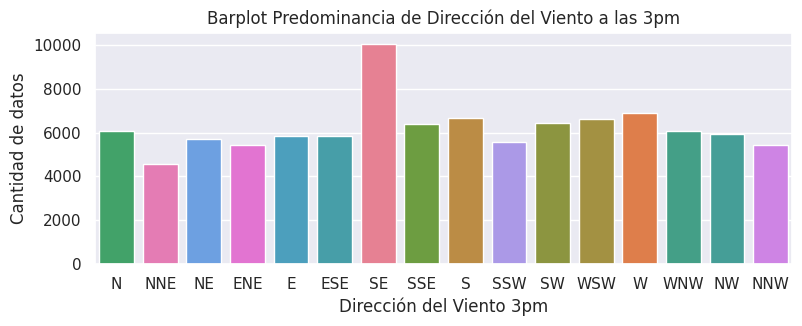

In [31]:
plt.figure(figsize=(9,3))
plt.title('Barplot Predominancia de Dirección del Viento a las 3pm')
sns.barplot(x=df['DirVien3pm'].value_counts().index, y=df['DirVien3pm'].value_counts(), hue=DirViento, order=DirViento, legend=False)
plt.xlabel('Dirección del Viento 3pm')
plt.ylabel('Cantidad de datos')

Con respecto a la dirección del viento, tanto en ráfagas como el viento a las 9am y 3pm, se puede decir que hay una fuerte predominancia en una de las direcciones:

Ráfagas de Viento: Oeste

Dir. del viento 9am: Norte

Dir. del viento 3pm: Sur-Este

No creo que este dato dé información relevante para determinar si lloverá en el dia de mañana o no.

## Humedad

Text(0, 0.5, 'suma')

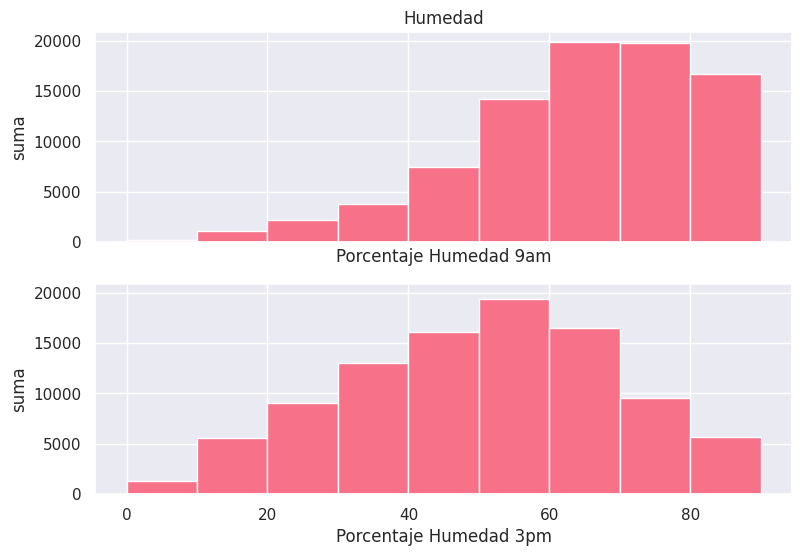

In [32]:
bin_range=range(0,100,10)
fig, ax=plt.subplots(nrows=2, ncols=1,figsize=(9,6), sharex=True,sharey=True)
ax[0].hist(df['Humedad9am'], label='Humedad 9am',bins=range(0,100,10))
ax[1].hist(df['Humedad3pm'], label='Humedad 3pm',bins=range(0,100,10))
ax[0].set_title('Humedad')
ax[0].set_xlabel('Porcentaje Humedad 9am')
ax[1].set_xlabel('Porcentaje Humedad 3pm')
ax[0].set_ylabel('suma')
ax[1].set_ylabel('suma')

En el caso de la humedad, se puede ver que durante la mañana hay mayor probabilidad de humedad relativa alta, superior al 60% y en el caso de la tarde, hay mayor probabilidad de humedad alrededor de 30%-70%.

## Lluvia Hoy

Text(0.5, 1.0, 'Gráfico de Torta Porcenaje de Lluvia Hoy')

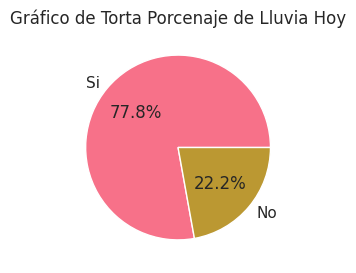

In [33]:
Etiqueta=['Si','No']
plt.figure(figsize=(3,3))
plt.pie(df['LluviaHoy'].value_counts(), labels=Etiqueta, autopct='%1.1f%%')
plt.title('Gráfico de Torta Porcenaje de Lluvia Hoy')

Con este gráfico podemos ver que nuestro dataset está desbalanceado, ya que no tiene la misma proporción de que haya lluvia a que no haya. Pero en realidad tiene que ver en que hay mayores probabilidades de que no llueva a que si llueva. Esperemos que este desbalanceo no perjudique la predicción.

## Temperatura Mínima vs Temperatura Máxima

Text(0, 0.5, 'Temperatura Máxima')

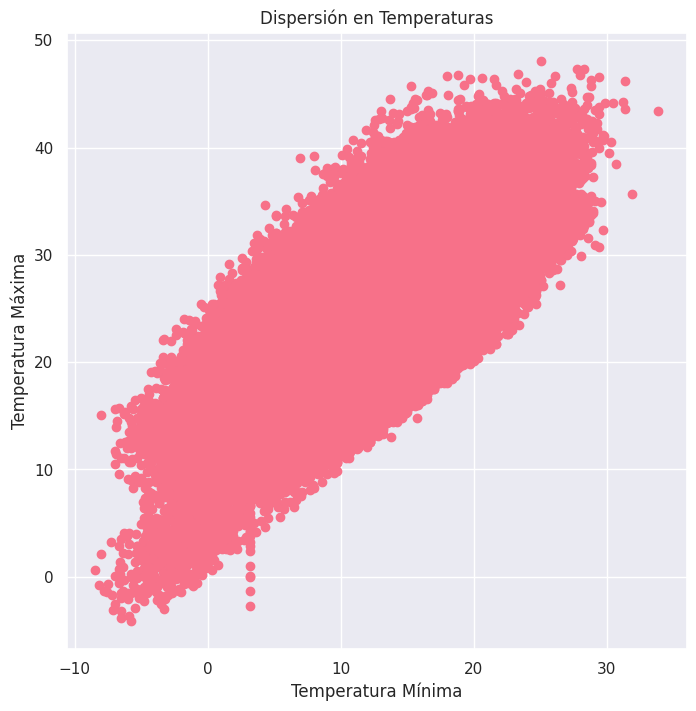

In [34]:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(df['MinTemp'],df['MaxTemp'])
ax.set_title('Dispersión en Temperaturas')
ax.set_xlabel('Temperatura Mínima')
ax.set_ylabel('Temperatura Máxima')

En este gráfico se puede apreciar una correlación muy fuerte entre la temperatura mínima y la temperatura máxima. Que de todas maneras se podia ver en el gráfico de correlaciones.

##Conclusiones antes de entrenar el modelo.

En mi proyecto trataremos de determinar a traves de un modelo de clasificación si Lloverá mañana teniendo en cuenta si Llovió hoy.

En el gráfico de correlación pudimos ver que no hay ninguna variable que tenga una correlación fuerte con el hecho de si llueve o no.

Las correlaciones mas fuertes son con respecto a la cantidad de milimetros de lluvia, y en segunda instancia los niveles de humedad, tanto de 9am y 3pm, y lluvia mañana.

Por lo tanto tomaremos estas cuatro variables para realizar el modelo de predicción:

'LluviaHoy', 'LluviaManana', 'Lluvia', 'Humedad9am' y 'Humedad3pm'.

##Entrenamiento del Modelo

###Probamos con Arbol de decisión

In [35]:
X=df[['LluviaHoy','Lluvia','Humedad9am','Humedad3pm']]
y=df['LluviaManana']
y=y.values.astype(int)

In [36]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [37]:
X2=X.values
y2=y

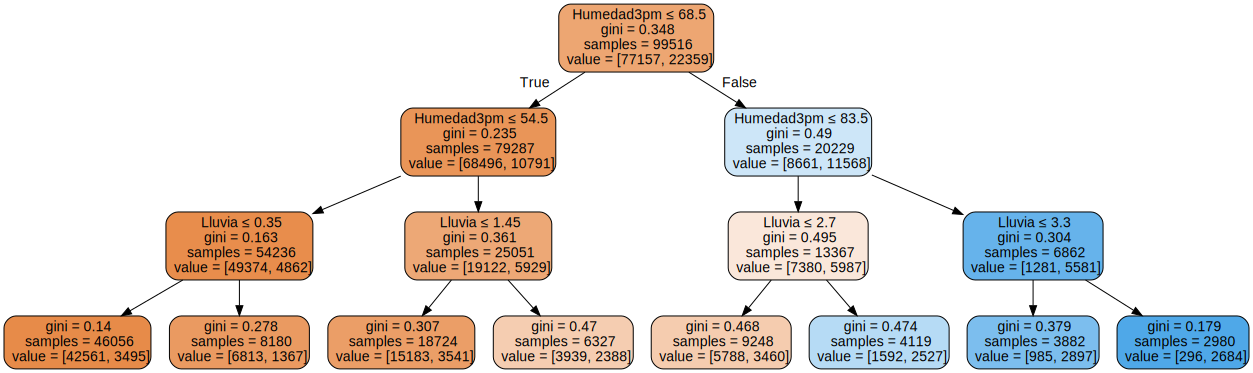

In [38]:
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=X.columns,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

###Probamos con PCA

In [39]:
df3=df[['LluviaHoy','LluviaManana','Lluvia','Humedad9am','Humedad3pm']]
df3.head()

,LluviaHoy,LluviaManana,Lluvia,Humedad9am,Humedad3pm
0,0.0,0.0,0.6,71.0,22.0
1,0.0,0.0,0.0,44.0,25.0
2,0.0,0.0,1.0,82.0,33.0
3,0.0,0.0,0.2,55.0,23.0
4,0.0,0.0,0.0,48.0,19.0


In [40]:
modelo_pca = PCA(n_components=5)
modelo_pca.fit(df3)

PCA(n_components=5)

In [41]:
modelo_pca.components_

array([[ 6.59416427e-03,  6.41933998e-03,  9.42138844e-02,
         6.59637295e-01,  7.45598882e-01],
       [ 7.05160311e-04,  7.63525475e-03,  3.30749046e-02,
        -7.50636344e-01,  6.59842659e-01],
       [ 2.04562887e-02,  6.02789646e-03,  9.94757172e-01,
        -3.75690195e-02, -9.26927330e-02],
       [-4.78139508e-01, -8.78082210e-01,  1.60651003e-02,
        -5.31934757e-05,  9.80577060e-03],
       [-8.78020598e-01,  4.78367841e-01,  1.51616781e-02,
         3.50487098e-03, -1.36987592e-03]])

In [42]:
modelo_pca.explained_variance_ratio_[0]

0.7692728299722432

In [43]:
lista_componentes = ['PC1','PC2','PC3','PC4','PC5']
componentes = pd.DataFrame(data=modelo_pca.components_,columns=df3.columns,index=lista_componentes)
componentes

,LluviaHoy,LluviaManana,Lluvia,Humedad9am,Humedad3pm
PC1,0.006594,0.006419,0.094214,0.659637,0.745599
PC2,0.000705,0.007635,0.033075,-0.750636,0.659843
PC3,0.020456,0.006028,0.994757,-0.037569,-0.092693
PC4,-0.478140,-0.878082,0.016065,-0.000053,0.009806
PC5,-0.878021,0.478368,0.015162,0.003505,-0.001370


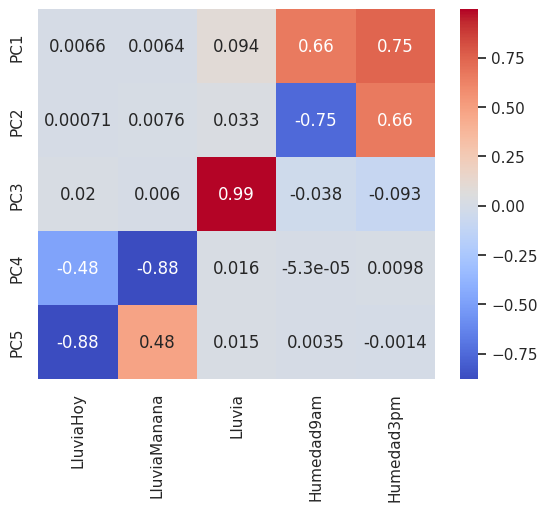

In [44]:
ax=sns.heatmap(componentes,cmap='coolwarm',annot=True)

In [45]:
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
[77. 15.  8.  0.  0.]


In [46]:
proyecciones = pd.DataFrame(modelo_pca.transform(df3),index=df3.index,columns=lista_componentes)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-20.816046,-21.060091,0.931180,-0.013948,0.108466
1,-36.445984,1.166773,1.070611,0.007267,0.000628
2,-5.320762,-22.045592,-0.103796,0.099756,0.138015
3,-30.662329,-8.403297,1.041689,-0.009717,0.044953
4,-38.281029,-5.794828,1.476492,-0.051781,0.022866


In [47]:
proyecciones.drop(columns=['PC3','PC4','PC5'],inplace=True)
proyecciones.head()

,PC1,PC2
0,-20.816046,-21.060091
1,-36.445984,1.166773
2,-5.320762,-22.045592
3,-30.662329,-8.403297
4,-38.281029,-5.794828


In [48]:
proyecciones['LluviaHoy'] = df['LluviaHoy']
proyecciones.head()

,PC1,PC2,LluviaHoy
0,-20.816046,-21.060091,0.0
1,-36.445984,1.166773,0.0
2,-5.320762,-22.045592,0.0
3,-30.662329,-8.403297,0.0
4,-38.281029,-5.794828,0.0


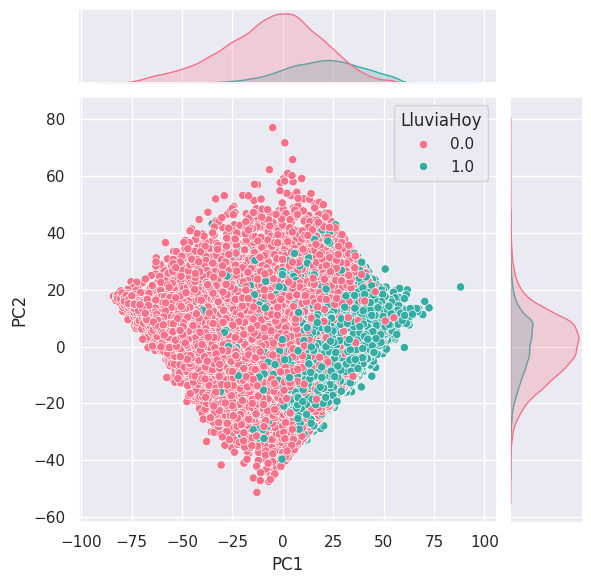

In [49]:
g= sns.jointplot(x='PC1',y='PC2',data=proyecciones,hue='LluviaHoy', palette='husl')
g.fig.set_figwidth(6)

In [50]:
proyecciones.LluviaHoy.value_counts() #No estan balanceadas las clases

LluviaHoy
0.0    77460
1.0    22056
Name: count, dtype: int64

In [51]:
proyecciones_features=proyecciones[['PC1','PC2']]
proyecciones_target=proyecciones['LluviaHoy']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(proyecciones_features, proyecciones_target, test_size=0.2, random_state=45)

In [53]:
modelo=KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
preds_train = modelo.predict(X_train)
preds_test = modelo.predict(X_test)
preds_test

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
print(metrics.classification_report(y_test,preds_test))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     15580
         1.0       0.95      0.74      0.83      4324

    accuracy                           0.93     19904
   macro avg       0.94      0.86      0.89     19904
weighted avg       0.93      0.93      0.93     19904



In [56]:
print(metrics.classification_report(y_train,preds_train))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     61880
         1.0       0.99      0.87      0.92     17732

    accuracy                           0.97     79612
   macro avg       0.98      0.93      0.95     79612
weighted avg       0.97      0.97      0.97     79612

